# Investigating Temporal Trends in Snowfall at JFK Airport in NYC, USA

### By Anna Poslednik

## Data & Site Description

Growing up in New York City, every snow storm not only brought a child-like sense of awe, as well as peace with the unusually slowed-down pace of the city, but also the allure of a rare snow day from school. How ever infrequent, snow days are some of my favorite childhood memories. The same could not be said for my mother who works at [JFK airport](https://en.wikipedia.org/wiki/John_F._Kennedy_International_Airport), where snow days mean flight cancellations and very unhappy customers. For this analysis, I focused on analyzing whether annual snowfall at JFK airport has changed from 1960-present day.

The data analyzed below are taken from the [**Global Historical Climatology Network - Daily**](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html). Specifically, I retrieved daily snowfall data (inches) for station [USW00094789](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094789/detail) from 1948-2024. This station is a continous monitoring station located at John F. Kennedy Airport in Queens, NY USA. Snowfall data is measured to the nearest tenth of an inch using a snowboard at 2400 h each day.  

**Data citation:**
Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. JFK Airport, NY (station: USW00094789). NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ 23 Sept 2024.

In [16]:
import pandas as pd
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
# Reading in the data for New York City
NYclimatedataurl = ('https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=SNOW'
    '&stations=USW00094789'
    '&startDate=1948-07-17'
    '&endDate=2024-09-20'
    '&units=standard')
NYclimatedataurl

#Converting to dataframe
snow_df = pd.read_csv(
    NYclimatedataurl,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
snow_df

,STATION,SNOW
DATE,,
1948-07-17,USW00094789,0.0
1948-07-18,USW00094789,0.0
1948-07-19,USW00094789,0.0
1948-07-20,USW00094789,0.0
1948-07-21,USW00094789,0.0
...,...,...
2024-09-16,USW00094789,0.0
2024-09-17,USW00094789,0.0
2024-09-18,USW00094789,0.0


<Axes: title={'center': 'Daily Snowfall at JFK airport, NYC'}, xlabel='Year', ylabel='Snowfall (inches)'>

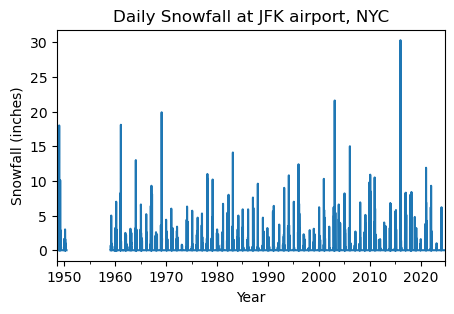

In [22]:
# Plotting daily snowfall at JFK airport
snow_df.plot(y='SNOW',
    title='Daily Snowfall at JFK airport, NYC',
    xlabel='Year',
    ylabel='Snowfall (inches)',
    figsize=(5,3),
    legend=False)

Looks like the data set is missing data in the 1950s, so my next step is to trim the dataset to remove those first years where there is missing data.

In [26]:
#Getting data from 1960-present
NYclimatedataurl2 = ('https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=SNOW'
    '&stations=USW00094789'
    '&startDate=1960-01-01'
    '&endDate=2024-09-20'
    '&units=standard')
NYclimatedataurl2

#Converting to dataframe
snow_df2 = pd.read_csv(
    NYclimatedataurl2,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
snow_df2 = snow_df2[['SNOW']]

%store snow_df2

dailysnowplot = snow_df2.hvplot(y='SNOW',
    title='Daily Snowfall at JFK airport, NYC',
    xlabel='Year',
    ylabel='Snowfall (inches)',
    figsize=(5,3),
    legend=False)
hv.save(dailysnowplot, 'dailysnowplot.html')
dailysnowplot


Stored 'snow_df2' (DataFrame)


/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  re

:Curve   [DATE]   (SNOW)

The interactive plot above is a great way to look up specific days with high snowfall and research how many inches of snowfall in NYC corresponded with a snow day. The highest peak of snowfall (30.3 inches) on January 23, 2016 broke records and resulted in [13,000 flight cancellations](https://en.wikipedia.org/wiki/January_2016_United_States_blizzard) that week. 

In [6]:
# Resampling data to get annual averages
ann_snow_df = snow_df2.resample('YS').mean()
%store ann_snow_df
ann_snow_df

Stored 'ann_snow_df' (DataFrame)


,SNOW
DATE,
1960-01-01,0.118956
1961-01-01,0.132418
1962-01-01,0.054247
1963-01-01,0.047802
1964-01-01,0.082787
...,...
2020-01-01,0.024863
2021-01-01,0.075342
2022-01-01,0.058904


## Patterns in annual snowfall at JFK Airport, NY have not changed over time.

In [25]:
# Making an interactive plot of annual snowfall
int_yearlysnowplot = ann_snow_df.hvplot(
    y='SNOW',
    title='Avg Annual Snowfall at JFK Airport, NYC',
    xlabel='Year',
    ylabel='Avg Snowfall (inches)',
    legend=False)
hv.save(int_yearlysnowplot, 'int_yearlysnowplot.html')
int_yearlysnowplot

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  re

:Curve   [DATE]   (SNOW)

The above graph provides annual average snowfall at JFK airport. The highest average snowfall occured in 2003 (0.17 inches), while 1973 and 2023 had the lowest annual average (0.006 in). No obvious linear trends are present in the above graph, and there is a lot of variability in the average annual snowfall from year to year. There is a suggestion in the graph that there are more extreme snowfall years (more high peaks) after 1990 vs before 1990, however further statistical analysis is needed. Because many daily values were 0, *annual* averages of snowfall may not be the most informative when analyzing changes in climate for this region. However, understanding how snowfall is changing over time at different locations around the world will provide more insight into the effects of climate change both locally and globally, as well as determine whether cyclic patterns exist in snowfall across decadal time scales. Because the data does not look to have a linear trend over time, OLS regression does not seem to be a reasonable model to fit to this data. 

# Bonus OLS Regression (however data does not fit assumptions)

array([[<Axes: title={'center': 'SNOW'}>]], dtype=object)

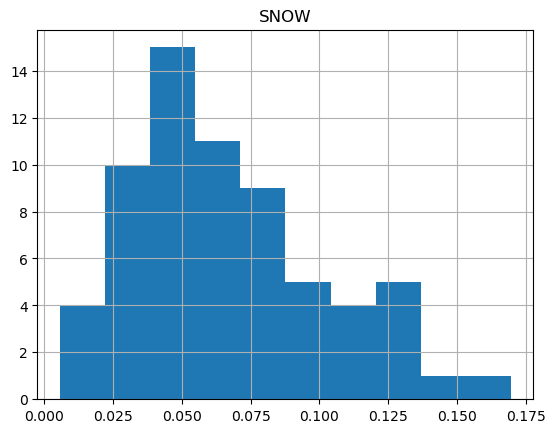

In [11]:
#Checking OLS assumptions - although OLS does not seem like a reasonable fit to the data based on above graph
ann_snow_df.hist(
    column='SNOW')

Data is a bit skewed (violating normality assumption), and the annual plot did not appear to have a linear trend, however I will try an OLS regression fit just as practice. 

In [20]:
# Fit an OLS Linear Regression to the data
# Drop no data values
observations = ann_snow_df.SNOW.dropna()
# Define the dependent variable and independent variable(s)
features = observations.index.year.values.reshape(-1, 1)
response = observations

# Create a Linear Regression model
model = LinearRegression()

# Fit the model 
model.fit(features, response)

# Calculate and print the metrics
print(f'Slope: {model.coef_[0]} inches per year')

Slope: -3.859289176251561e-05 inches per year


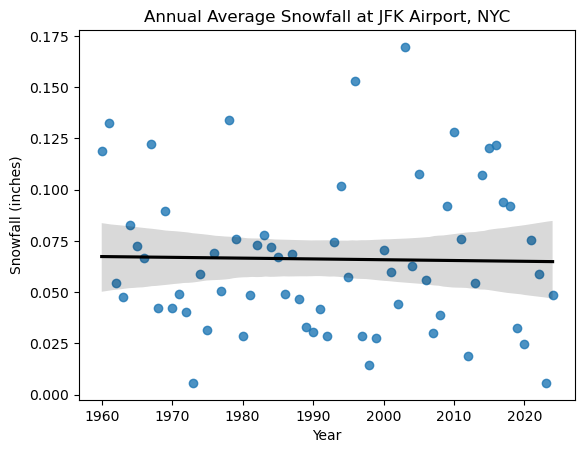

In [19]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x=features, 
    y=response,
    line_kws={'color': 'black'}
    )
# Set plot labels
ax.set(
    title='Annual Average Snowfall at JFK Airport, NYC',
    xlabel='Year',
    ylabel='Snowfall (inches)'
)
# Display the plot without extra text
plt.show()

Clearly the OLS regression is a poor fit to the data, and I would not recommend using it in this way. 